# Análise de preços de combustíveis no Brasil

Este projeto realiza uma análise exploratória sobre os preços dos combustíveis no Brasil, usando dados coletados por estado e região.

Objetivos:
- Limpeza e pré-processamento dos dados
- Análise exploratória dos preços por produto, estado e região
- Visualização da evolução temporal
- Insights gerais

**Autor**: Eduardo  
**Data**: Junho/2025

## 1. Carregamento e Limpeza dos dados 

In [2]:
# Import the libraries which will be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("combustiveis_2024.csv", delimiter = ";")

# Show first few rows
df.head()
#print(df.dtypes)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,GASOLINA,01/07/2024,"6,79",NaN,R$ / litro,VIBRA
1,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,GASOLINA ADITIVADA,01/07/2024,"6,84",NaN,R$ / litro,VIBRA
2,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,DIESEL,01/07/2024,"6,99",NaN,R$ / litro,VIBRA
3,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,DIESEL S10,01/07/2024,"6,99",NaN,R$ / litro,VIBRA
4,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,ETANOL,01/07/2024,"4,69",NaN,R$ / litro,VIBRA


In [75]:
# Clean columns names
df.columns = [col.strip().lower().replace(" ", "_").replace("ç", "c").replace("-","").replace("ã","a") for col in df.columns]

# Automatically drops all-NaN columns
df.dropna(axis=1, how = 'all', inplace = True)

# Convert date column to datetime
df["data_da_coleta"] = pd.to_datetime(df["data_da_coleta"], dayfirst=True)

# Replace comma with dot in price columns and convert to float
df['valor_de_venda'] = df['valor_de_venda'].astype(str).str.replace(',', '.').astype(float)

# Convert price columns to numbers
df["valor_de_venda"] = pd.to_numeric(df["valor_de_venda"], errors = 'coerce')

# See DataFrame after changes
df.head()

,regiao__sigla,estado__sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
0,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,GASOLINA,2024-07-01,6.79,R$ / litro,VIBRA
1,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,GASOLINA ADITIVADA,2024-07-01,6.84,R$ / litro,VIBRA
2,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,DIESEL,2024-07-01,6.99,R$ / litro,VIBRA
3,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,DIESEL S10,2024-07-01,6.99,R$ / litro,VIBRA
4,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,RODOVIA BR-364 (RIO BRANCO-CRUZEIRO DO SUL) - ...,2755,LOTE 01/02/03/04/05 E 33,PORTAL DA AMAZONIA,69915-630,ETANOL,2024-07-01,4.69,R$ / litro,VIBRA


## 2. Análise Exploratória

### 2.1 Média por tipo de combustível

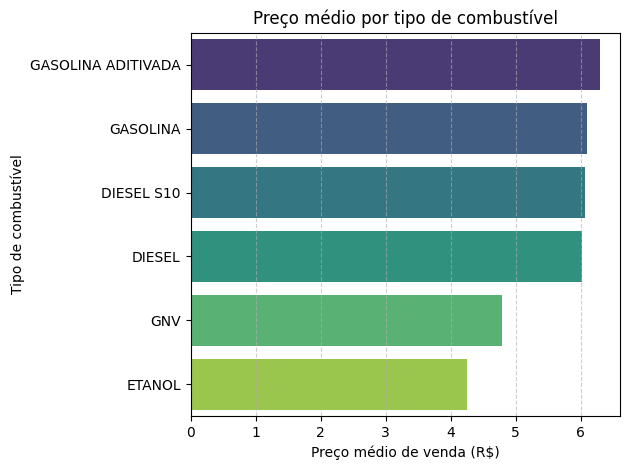

In [82]:
average_by_product = (
    df.groupby("produto")["valor_de_venda"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(
    data=average_by_product,
    x='valor_de_venda',
    y='produto',
    hue = 'produto',
    palette='viridis',
    legend = False
)

plt.title('Preço médio por tipo de combustível')
plt.xlabel('Preço médio de venda (R$)')
plt.ylabel('Tipo de combustível')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 2.2 Média dos combustiveis por estado

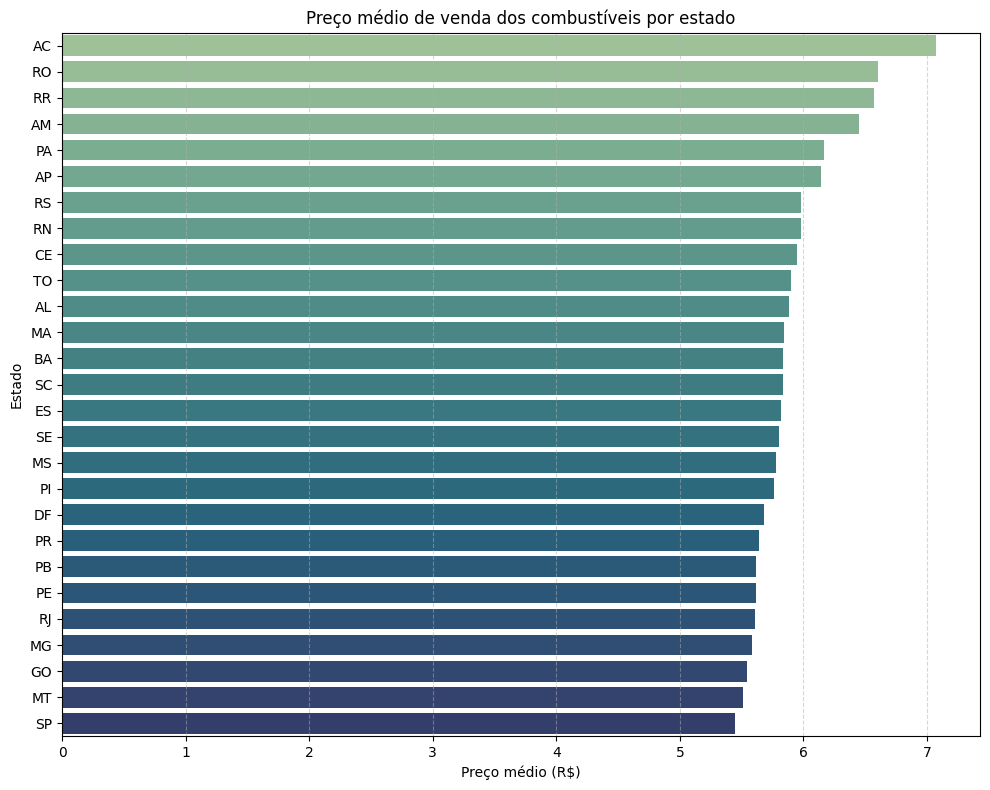

In [86]:
# Average selling price by state
media_por_estado = (
    df.groupby('estado__sigla')['valor_de_venda']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=media_por_estado,
    x='valor_de_venda',
    y='estado__sigla',
    hue = "estado__sigla",
    palette='crest',
    legend = False
)

plt.title('Preço médio de venda dos combustíveis por estado')
plt.xlabel('Preço médio (R$)')
plt.ylabel('Estado')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 2.3 Comparação entre média de preço de gasolina comum e aditivada por estado

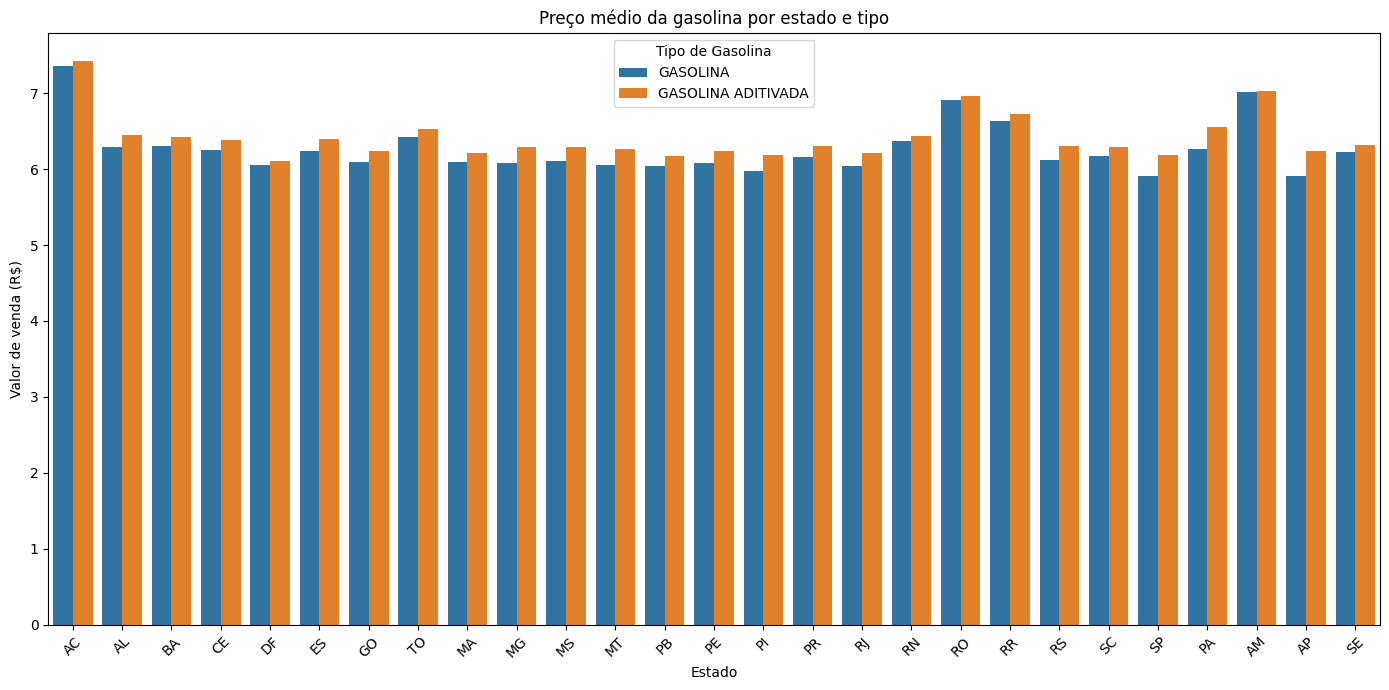

In [87]:
# Filter original df which only contains the product "Gasoline"
gasoline_df = df[df["produto"].str.contains("GASOLINA", case=False, na=False)]

# Group by state and calculate the mean selling price of gasoline
average_gasoline_price_by_state = (
    gasoline_df.groupby("estado__sigla")["valor_de_venda"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(14, 7))
sns.barplot(data=gasoline_df, x='estado__sigla', y='valor_de_venda', hue='produto', errorbar=None)
plt.title('Preço médio da gasolina por estado e tipo')
plt.xlabel('Estado')
plt.ylabel('Valor de venda (R$)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Gasolina')
plt.tight_layout()
plt.show()

### 2.4 Boxplot do preço dos produtos separados por regiões

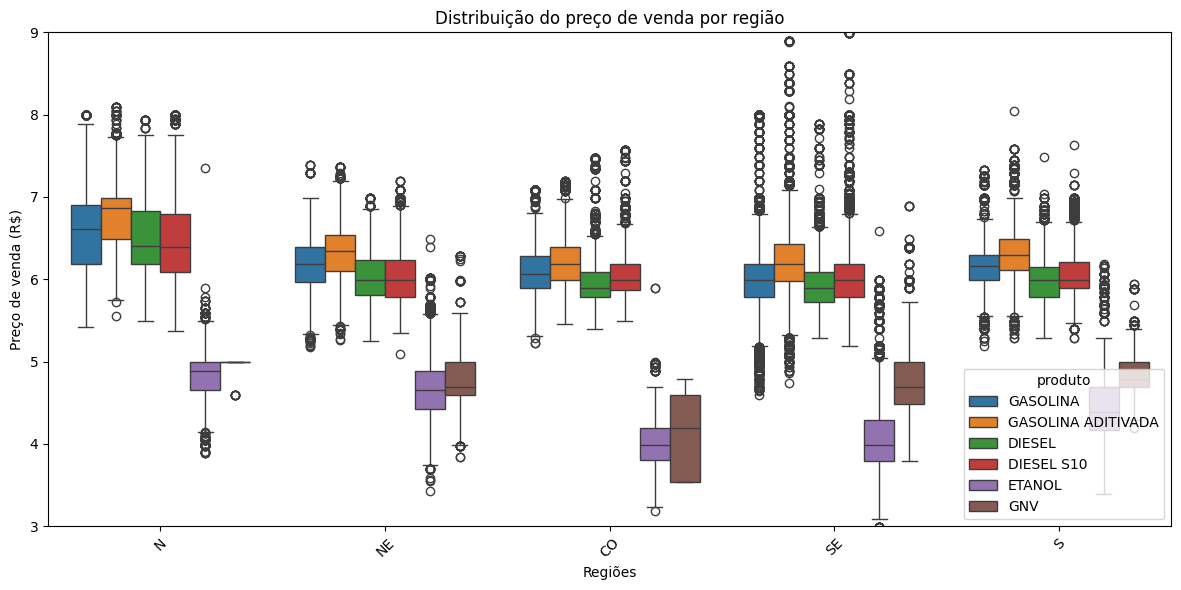

In [54]:
# Boxplot of gasoline by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='regiao__sigla', y='valor_de_venda', hue='produto')
plt.xticks(rotation=45)
plt.title('Distribuição do preço de venda por região')
plt.ylabel('Preço de venda (R$)')
plt.xlabel('Regiões')
plt.tight_layout()
plt.ylim(3,9)
plt.show()

### 2.5 Evolução do preço da gasolina por mês

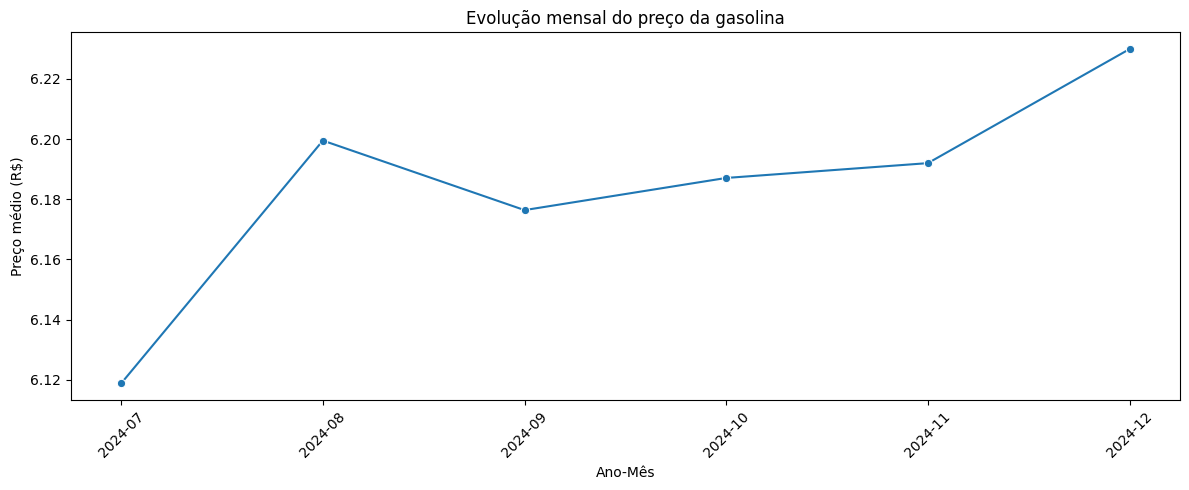

In [89]:
# Create a column with just year-month for grouping
gasoline_df.loc[:,'ano_mes'] = gasoline_df['data_da_coleta'].dt.to_period('M').astype(str)

# Group by month and get average price
monthly_average = (
    gasoline_df.groupby('ano_mes')['valor_de_venda']
    .mean()
    .reset_index()
)

# Plot the trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_average, x='ano_mes', y='valor_de_venda', marker='o')
plt.title('Evolução mensal do preço da gasolina')
plt.xlabel('Ano-Mês')
plt.ylabel('Preço médio (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Conclusões

- A gasolina comum tende a ter preço mais baixo que a aditivada.
- O Norte do Brasil apresenta preços consistentemente mais altos.
- O Sudeste tem grande variação, sugerindo heterogeneidade urbana/rural.
- Há tendência de aumento de preços em determinados períodos (ex: crises ou inflação).

Próximos passos: prever preços, comparar com renda média por estado, aplicar modelos de machine learning simples.

---